# Import necessary Libraries

In [77]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot  as plt
import seaborn as sns 
from xgboost import XGBRegressor

# Exploring the Dataset

In [95]:
df = pd.read_csv('Walmart_Store_sales.csv')

In [79]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [96]:
df['Date'] =pd.to_datetime(df['Date'],dayfirst = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [97]:
# Using to extract year 
df['Year'] = pd.to_datetime(df['Date']).dt.year
# Using to extract month
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [46]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3


In [47]:
df.shape

(6435, 10)

# Exploratory Data Analysis

In [98]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.447552
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.238308


<Axes: title={'center': 'Total Weekly Sales Over Time'}, xlabel='Date'>

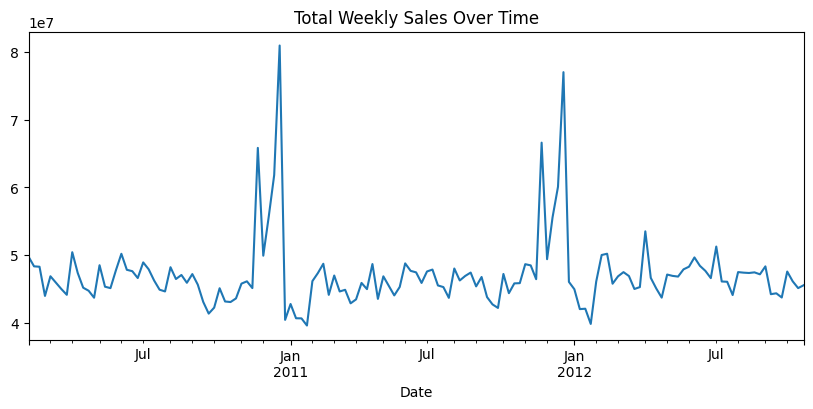

In [99]:
# we are visualizing the sales trend over the time 

df.groupby('Date')['Weekly_Sales'].sum().plot(figsize=(10,4),title='Total Weekly Sales Over Time')

<Axes: title={'center': 'Total Sales per Store'}, xlabel='Store'>

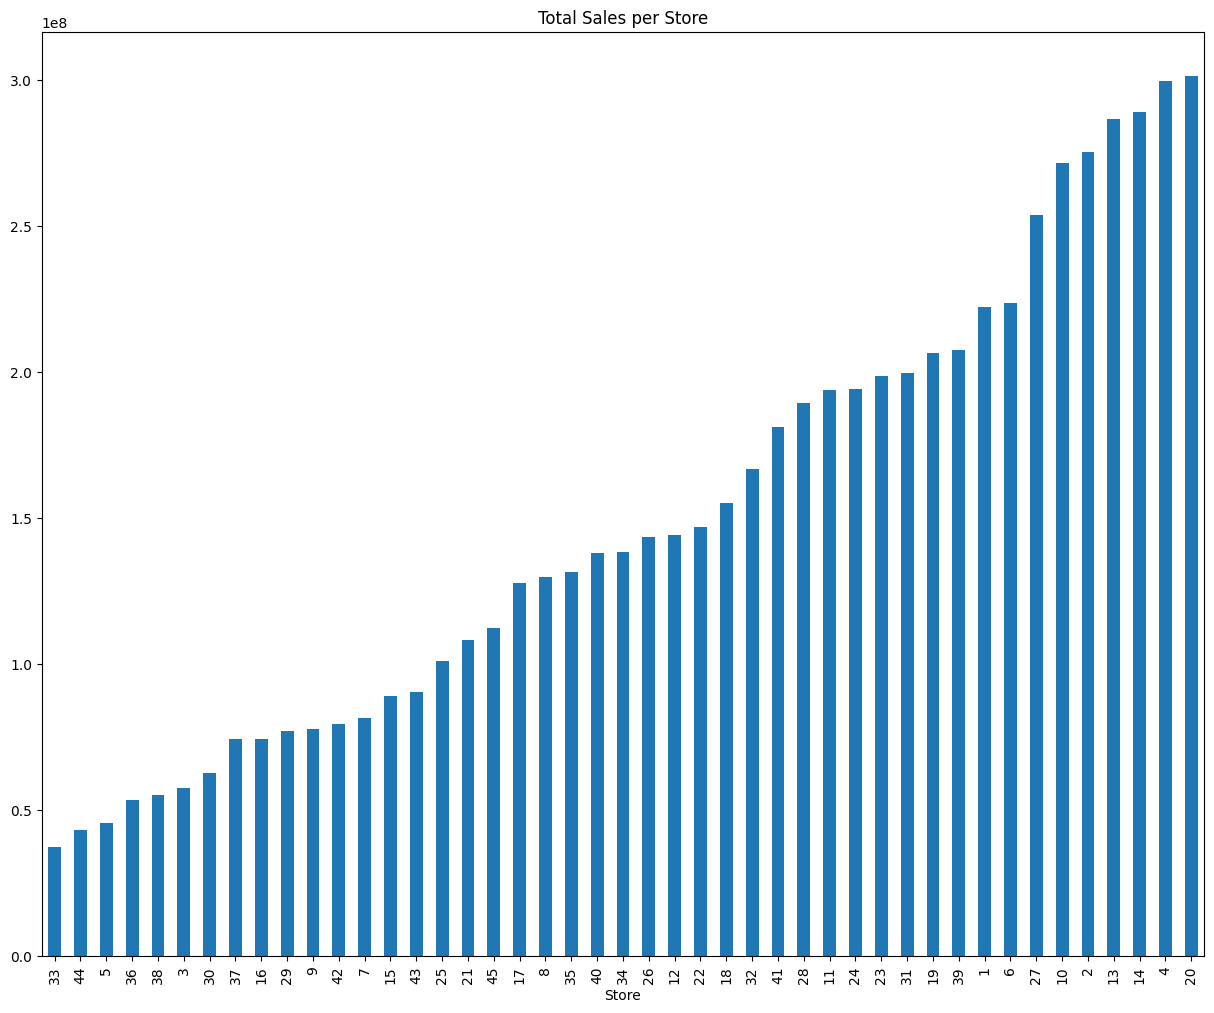

In [100]:
# we are visualizing the total sales by stores to identify which store is having maximum sales 

df.groupby('Store')['Weekly_Sales'].sum().sort_values().plot(figsize=(15,12),kind='bar',title='Total Sales per Store')

<Axes: title={'center': 'Average Sales - Holiday vs Non-Holiday'}, xlabel='Holiday_Flag'>

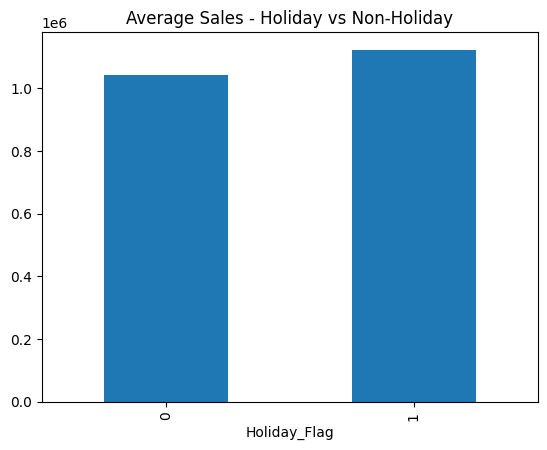

In [101]:
df.groupby('Holiday_Flag')['Weekly_Sales'].mean().plot(kind='bar', title='Average Sales - Holiday vs Non-Holiday')


<Axes: title={'center': 'Monthly Sales per Year'}, xlabel='Month'>

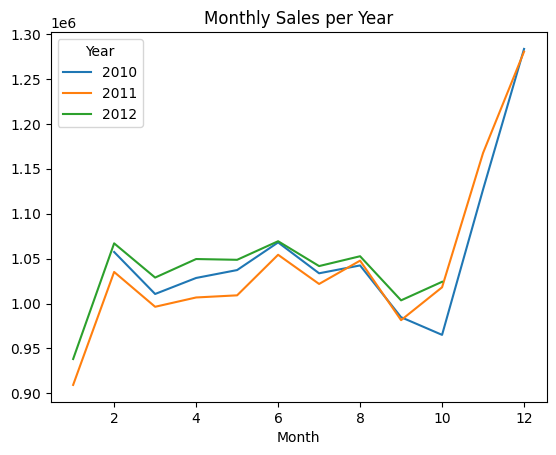

In [102]:

df.groupby(['Year', 'Month'])['Weekly_Sales'].mean().unstack(0).plot(title='Monthly Sales per Year')


# Model Building

In [103]:
features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag', 'Month', 'Year']
target = 'Weekly_Sales'

X = df[features]
y = df[target]

In [104]:
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [105]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [106]:
y_pred = model.predict(X_test)

In [108]:
r2_lin = r2_score(y_test,y_pred)
rmse_lin =(mean_squared_error(y_test,y_pred,squared = False))
print("R2 Score:", r2_lin)
print("RMSE:", rmse_lin)

R2 Score: 0.02797471217768499
RMSE: 559591.264595309


# Improve Model with Feature Engineering

In [109]:
df['WeekOfYear'] = pd.to_datetime(df['Date']).dt.isocalendar().week
df['Store_Avg_Sales'] = df.groupby('Store')['Weekly_Sales'].transform('mean')
df['Month_Avg_Sales'] = df.groupby(['Store', 'Month'])['Weekly_Sales'].transform('mean')


In [110]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,WeekOfYear,Store_Avg_Sales,Month_Avg_Sales
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,1.555264e+06,1.625442e+06
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,1.555264e+06,1.625442e+06
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,1.555264e+06,1.625442e+06
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,1.555264e+06,1.625442e+06
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,1.555264e+06,1.567744e+06


# Train Model with RandomForestRegressor

In [112]:
# Drop non-numeric or unnecessary columns
X = df.drop(['Weekly_Sales', 'Date'], axis=1)
y = df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

r2_rfr = r2_score(y_test,y_pred)
msme_rfr = mean_squared_error(y_test,y_pred,squared= False)

print("R² Score:", r2_rfr)
print("RMSE:", msme_rfr)


R² Score: 0.9786590867813634
RMSE: 82916.05759342507


# Feature Importance 

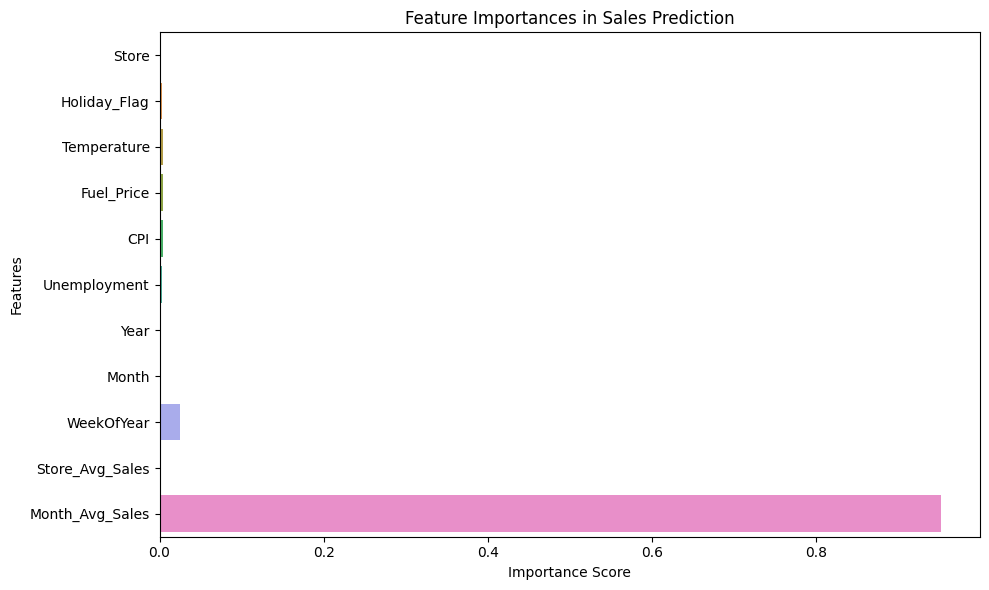

In [113]:

importances = rf.feature_importances_


features = X.columns

# Create the plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances in Sales Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


# Feature Engineering

In [114]:
df['Sales_MA3'] = df.groupby('Store')['Weekly_Sales'].transform(lambda x : x.rolling(window=3,min_periods=1).mean())

In [115]:
df['Prev_Week_Sales'] = df.groupby('Store')['Weekly_Sales'].shift(1)


In [116]:
df['Sales_Change'] = df['Weekly_Sales'] - df['Prev_Week_Sales']


In [117]:
df.dropna(inplace=True)


In [118]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,WeekOfYear,Store_Avg_Sales,Month_Avg_Sales,Sales_MA3,Prev_Week_Sales,Sales_Change
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,1.555264e+06,1.625442e+06,1.642824e+06,1643690.90,-1733.46
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,1.555264e+06,1.625442e+06,1.632539e+06,1641957.44,-29989.27
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,1.555264e+06,1.625442e+06,1.554551e+06,1611968.17,-202240.58
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,1.555264e+06,1.567744e+06,1.525501e+06,1409727.59,145079.09
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,2010,3,10,1.555264e+06,1.567744e+06,1.468025e+06,1554806.68,-115265.09


# Now lets work on XGboost model 

In [70]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/29/22/e3ff2dfafe862a91733dfa0aecdb4794aa1d9a18e09a14e118bde0cbc2db/xgboost-3.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 217.9 kB/s eta 0:11:29
   ---------------------------------------- 0.1/150.0 MB 252.2 kB/s eta 0:09:55
   ---------------------------------------- 0.1/150.0 MB 280.5 kB/s eta 0:08:55
   ---------------------------------------- 0.1/150.0 MB 280.5 kB/s eta 0:08:55
   ---------------------------------------- 0.1/150.0 MB 280.5 kB/s eta 0:08:55
   -------------------------------------

In [120]:
xgb_model = XGBRegressor(n_estimators = 10 ,learning_rate = 0.1 , max_depth = 6, random_state=42)
xgb_model.fit(X_train,y_train)

y_pred_xgb = xgb_model.predict(X_test)

r2_xgb = r2_score(y_test,y_pred_xgb)
rmse_xgb = mean_squared_error(y_test,y_pred_xgb,squared=False)


print("R2 Score (XGBoost):", r2_xgb)
print("RMSE (XGBoost):", rmse_xgb)

R2 Score (XGBoost): 0.8512834231436783
RMSE (XGBoost): 218882.900362197


# Comparison of all the models 

In [123]:
results = {
    'Model' :['Linear Regression','RandomForest','XGBoost'],
    'R2 Score':[r2_lin,r2_rfr,r2_xgb],
    'RMSE':[rmse_lin,msme_rfr,rmse_xgb]
}

results = pd.DataFrame(results)
print(results)

               Model  R2 Score           RMSE
0  Linear Regression  0.027975  559591.264595
1       RandomForest  0.978659   82916.057593
2            XGBoost  0.851283  218882.900362


# Actual vs Predicted Insights

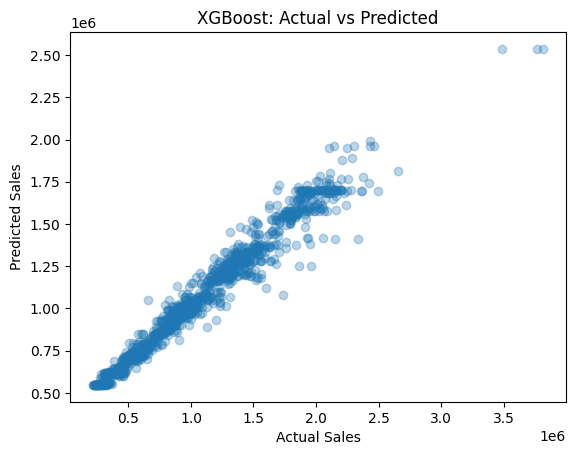

In [75]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_xgb, alpha=0.3)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("XGBoost: Actual vs Predicted")
plt.show()


## Business Insights

### 1. Holiday Weeks Drive Higher Sales
> From the EDA, holiday weeks showed increased sales.

 **Recommendation:** Focus on promotions around holidays.

---

### 2. Sales Vary by Store
> Some stores consistently outperform others.

 **Recommendation:** Study high-performing stores to replicate success.

---

### 3. Seasonal Trends Matter
> Monthly sales show peaks in November and December.

 **Recommendation:** Prepare stock and marketing around seasonal spikes.

---

### 4. Model Performance
> XGBoost outperformed other models with the best R² and RMSE.

 **Recommendation:** Use XGBoost for future weekly sales forecasting.


**Conclusion**:
 > The project successfully analyzed historical Walmart sales data to identify key trends influencing weekly sales. Holiday weeks and seasonality were found to have a significant effect on sales volume. Among the predictive models tested, XGBoost achieved the highest performance, indicating its suitability for this forecasting task. These results can assist Walmart in better inventory management and marketing strategies. Future work could include integrating additional features and updating the model regularly to adapt to changing market conditions.